## PCA Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:

# Generate Sample Data (2D)
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T  # 2D dataset

# Standardize the data (PCA requires zero mean)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (Reduce from 2D to 1D)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)
# Get PCA components (Eigenvectors)
components = pca.components_

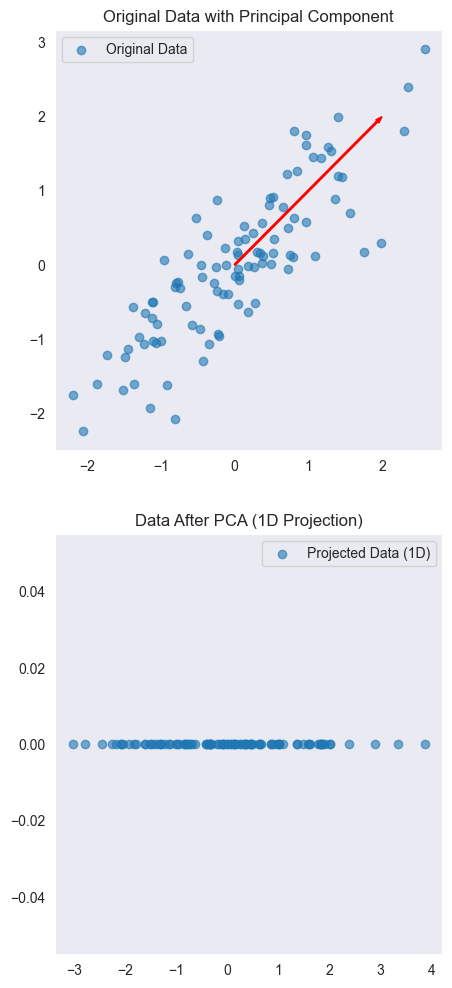

In [5]:


# Plot Original Data and PCA Projection
fig, ax = plt.subplots(2, 1, figsize=(5, 12))

# Original Data
ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.6, label="Original Data")
for length, vector in zip(pca.explained_variance_, components):
    vector = vector * np.sqrt(length) * 2  # Scale eigenvector
    ax[0].arrow(0, 0, vector[0], vector[1], color='r', width=0.02)
ax[0].set_title("Original Data with Principal Component")
ax[0].legend()
ax[0].grid()

# PCA Projection
ax[1].scatter(X_pca, np.zeros_like(X_pca), alpha=0.6, label="Projected Data (1D)")
ax[1].set_title("Data After PCA (1D Projection)")
ax[1].legend()
ax[1].grid()

plt.show()

## Wine dataset PCA

In [7]:
from sklearn.datasets import load_wine
import pandas as pd

In [8]:
# Load Wine Dataset
wine = load_wine()
X = wine.data  # Features (13-dimensional)
y = wine.target  # Class labels
feature_names = wine.feature_names

# Standardize the Data (PCA works better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Apply PCA (Reduce from 13D to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for better visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

Explained Variance: PC1 = 36.20%, PC2 = 19.21%


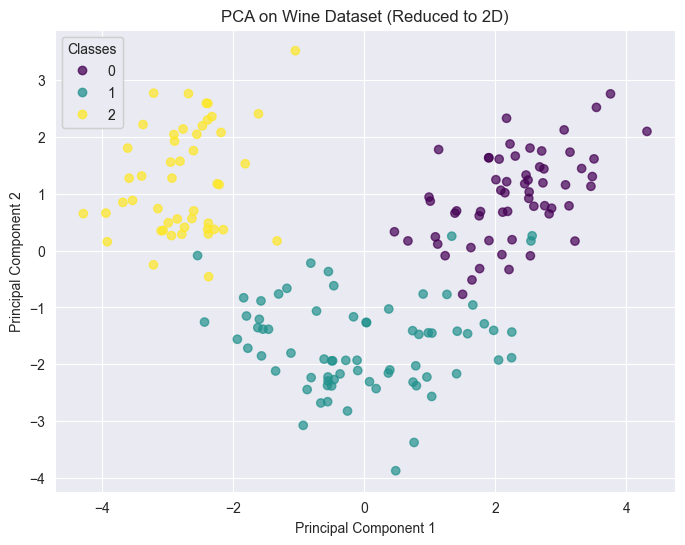

In [10]:
# Plot the PCA-transformed data
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Target'], cmap='viridis', alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Labels and Title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("PCA on Wine Dataset (Reduced to 2D)")

# Display explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: PC1 = {explained_variance[0]*100:.2f}%, PC2 = {explained_variance[1]*100:.2f}%")

# Show the plot
plt.show()

### Visualize the explained variance

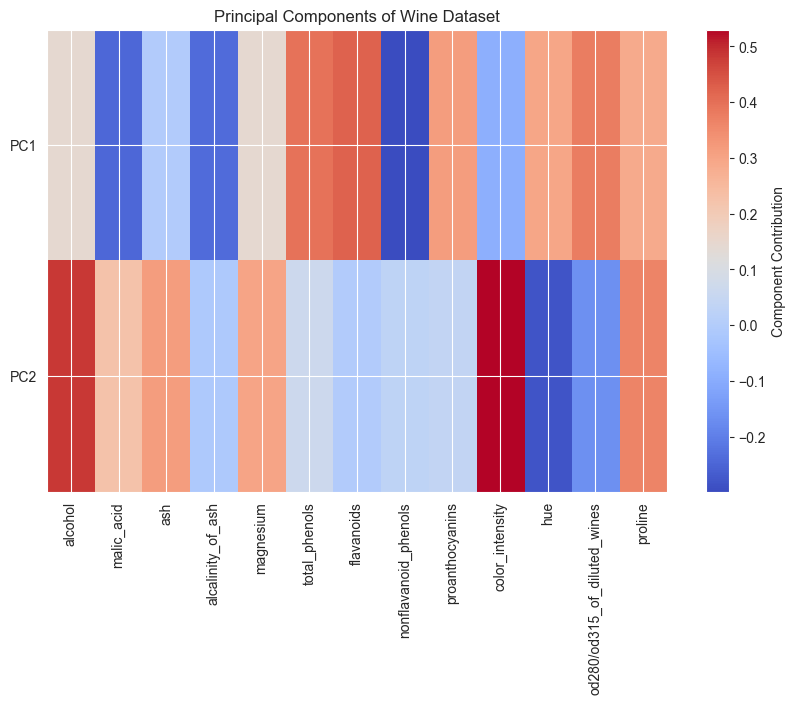

In [11]:
# Perform PCA on Wine Dataset and visualize the principal components separately

# Compute PCA components
components = pca.components_

# Create a new figure for visualizing the principal components
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Principal Components as a Heatmap
im = ax.imshow(components, cmap='coolwarm', aspect='auto')

# Set labels
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_yticks(np.arange(2))
ax.set_yticklabels(["PC1", "PC2"])
ax.set_title("Principal Components of Wine Dataset")

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Component Contribution")

plt.show()